In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Display the first 5 rows of X and y
print("First 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

First 5 rows of X:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

First 5 rows of y:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [3]:
X.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
127,6.1,3.0,4.9,1.8
66,5.6,3.0,4.5,1.5
122,7.7,2.8,6.7,2.0
115,6.4,3.2,5.3,2.3
77,6.7,3.0,5.0,1.7
145,6.7,3.0,5.2,2.3
132,6.4,2.8,5.6,2.2
121,5.6,2.8,4.9,2.0
56,6.3,3.3,4.7,1.6
99,5.7,2.8,4.1,1.3



```python
from sklearn.tree import DecisionTreeClassifier

# 1. Instantiate a DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# 2. Fit the DecisionTreeClassifier to the training data
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")
```

## Demonstrate Gini Impurity and Entropy with Simple Example

### Subtask:
Introduce Gini Impurity and Entropy using a small, easy-to-understand dataset (e.g., the fruit basket example) to build foundational understanding before applying to the main dataset.


In [ ]:
import pandas as pd
import numpy as np

# 1. Create a simple dataset
# Imagine we have a fruit basket with different fruits and their colors
data = {
    'Fruit': ['Apple', 'Apple', 'Orange', 'Apple', 'Orange', 'Grape', 'Grape', 'Apple'],
    'Color': ['Red', 'Green', 'Orange', 'Red', 'Orange', 'Purple', 'Green', 'Red']
}
df_fruits = pd.DataFrame(data)
display(df_fruits)

# 2. Define functions to calculate Gini impurity and Entropy
def calculate_gini_impurity(series):
    # Count the occurrences of each class
    counts = series.value_counts()
    # Calculate the probability of each class
    probabilities = counts / len(series)
    # Calculate Gini impurity: 1 - sum(p_i^2)
    gini = 1 - np.sum(probabilities**2)
    return gini

def calculate_entropy(series):
    # Count the occurrences of each class
    counts = series.value_counts()
    # Calculate the probability of each class
    probabilities = counts / len(series)
    # Calculate Entropy: -sum(p_i * log2(p_i))
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9)) # Add small epsilon to avoid log(0)
    return entropy

# 3. Calculate Gini impurity and Entropy for the 'Fruit' column
gini_fruit = calculate_gini_impurity(df_fruits['Fruit'])
entropy_fruit = calculate_entropy(df_fruits['Fruit'])

print(f"\nGini Impurity for 'Fruit': {gini_fruit:.4f}")
print(f"Entropy for 'Fruit': {entropy_fruit:.4f}")

# 4. Let's imagine a split based on 'Color' to show reduction in impurity
# Split 1: Red Fruits
red_fruits = df_fruits[df_fruits['Color'] == 'Red']
gini_red = calculate_gini_impurity(red_fruits['Fruit'])
entropy_red = calculate_entropy(red_fruits['Fruit'])
print(f"\nGini Impurity for 'Fruit' (Red Color): {gini_red:.4f}")
print(f"Entropy for 'Fruit' (Red Color): {entropy_red:.4f}")

# Split 2: Orange Fruits
orange_fruits = df_fruits[df_fruits['Color'] == 'Orange']
gini_orange = calculate_gini_impurity(orange_fruits['Fruit'])
entropy_orange = calculate_entropy(orange_fruits['Fruit'])
print(f"Gini Impurity for 'Fruit' (Orange Color): {gini_orange:.4f}")
print(f"Entropy for 'Fruit' (Orange Color): {entropy_orange:.4f}")

# Split 3: Other Colors (Green, Purple)
other_fruits = df_fruits[~df_fruits['Color'].isin(['Red', 'Orange'])]
gini_other = calculate_gini_impurity(other_fruits['Fruit'])
entropy_other = calculate_entropy(other_fruits['Fruit'])
print(f"Gini Impurity for 'Fruit' (Other Colors): {gini_other:.4f}")
print(f"Entropy for 'Fruit' (Other Colors): {entropy_other:.4f}")

,Fruit,Color
0,Apple,Red
1,Apple,Green
2,Orange,Orange
3,Apple,Red
4,Orange,Orange
5,Grape,Purple
6,Grape,Green
7,Apple,Red



Gini Impurity for 'Fruit': 0.6250
Entropy for 'Fruit': 1.5000

Gini Impurity for 'Fruit' (Red Color): 0.0000
Entropy for 'Fruit' (Red Color): -0.0000
Gini Impurity for 'Fruit' (Orange Color): 0.0000
Entropy for 'Fruit' (Orange Color): -0.0000
Gini Impurity for 'Fruit' (Other Colors): 0.4444
Entropy for 'Fruit' (Other Colors): 0.9183


In [ ]:
Gini : Randomness of data / Impurity of Node
Entropy : Randomness of data / Impurity of Node

Split : All classified in single decision branch (Pure split)/ Impure (Otherwise)


## Calculate Gini Impurity and Entropy for Iris Dataset

### Subtask:
Calculate Gini Impurity and Entropy for the Iris dataset's target variable, and demonstrate how a split can reduce impurity.


**Reasoning**:
The subtask requires calculating Gini impurity and entropy for the entire Iris target variable, demonstrating how a split reduces impurity by calculating these metrics for the resulting subsets, and then computing the information gain. This involves using previously defined functions and printing the results as specified.



In [ ]:
# 1. Calculate Gini impurity and Entropy for the entire Iris target variable (y)
gini_iris_total = calculate_gini_impurity(y)
entropy_iris_total = calculate_entropy(y)

print(f"\nGini Impurity for entire Iris target (y): {gini_iris_total:.4f}")
print(f"Entropy for entire Iris target (y): {entropy_iris_total:.4f}")

# 2. Demonstrate impurity reduction with a split based on 'petal length (cm)'
# From our Decision Tree visualization, a common first split is often around petal length <= 2.45
split_feature = 'petal length (cm)'
split_threshold = 2.45

# Create subsets based on the split
y_left = y[X[split_feature] <= split_threshold]
y_right = y[X[split_feature] > split_threshold]

# Calculate Gini impurity and Entropy for the subsets
gini_iris_left = calculate_gini_impurity(y_left)
entropy_iris_left = calculate_entropy(y_left)

gini_iris_right = calculate_gini_impurity(y_right)
entropy_iris_right = calculate_entropy(y_right)

print(f"\nAfter splitting on '{split_feature}' <= {split_threshold}:")
print(f"  Gini Impurity for left branch (y_left): {gini_iris_left:.4f}")
print(f"  Entropy for left branch (y_left): {entropy_iris_left:.4f}")
print(f"  Gini Impurity for right branch (y_right): {gini_iris_right:.4f}")
print(f"  Entropy for right branch (y_right): {entropy_iris_right:.4f}")

# Calculate Information Gain for Gini Impurity
# Weighted average of child impurities
weight_left = len(y_left) / len(y)
weight_right = len(y_right) / len(y)

weighted_gini = (weight_left * gini_iris_left) + (weight_right * gini_iris_right)
gini_information_gain = gini_iris_total - weighted_gini
print(f"\nInformation Gain (Gini) from this split: {gini_information_gain:.4f}")

# Calculate Information Gain for Entropy
weighted_entropy = (weight_left * entropy_iris_left) + (weight_right * entropy_iris_right)
entropy_information_gain = entropy_iris_total - weighted_entropy
print(f"Information Gain (Entropy) from this split: {entropy_information_gain:.4f}")


Gini Impurity for entire Iris target (y): 0.6667
Entropy for entire Iris target (y): 1.5850

After splitting on 'petal length (cm)' <= 2.45:
  Gini Impurity for left branch (y_left): 0.0000
  Entropy for left branch (y_left): -0.0000
  Gini Impurity for right branch (y_right): 0.5000
  Entropy for right branch (y_right): 1.0000

Information Gain (Gini) from this split: 0.3333
Information Gain (Entropy) from this split: 0.9183


## Calculate Information Gain for Other Iris Features

### Subtask:
Calculate and compare Information Gain (Gini and Entropy) for 'sepal length (cm)', 'sepal width (cm)', and 'petal width (cm)'.


**Reasoning**:
The subtask requires calculating and comparing Information Gain (Gini and Entropy) for specified Iris features. This involves iterating through each feature, determining a split threshold (mean), creating subsets, calculating impurity for subsets, and then computing Information Gain for both Gini and Entropy, finally printing the results.



In [ ]:
other_features = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']

print(f"\nCalculating Information Gain for other features:")

for feature in other_features:
    # Use the mean of the feature as a simple split threshold for demonstration
    split_threshold = X[feature].mean()

    # Create subsets based on the split
    y_left = y[X[feature] <= split_threshold]
    y_right = y[X[feature] > split_threshold]

    # Skip if one of the subsets is empty (can happen with simple thresholding)
    if len(y_left) == 0 or len(y_right) == 0:
        print(f"\n  Skipping '{feature}' due to empty subset after split at {split_threshold:.2f}")
        continue

    # Calculate Gini impurity and Entropy for the subsets
    gini_left = calculate_gini_impurity(y_left)
    entropy_left = calculate_entropy(y_left)

    gini_right = calculate_gini_impurity(y_right)
    entropy_right = calculate_entropy(y_right)

    # Calculate Information Gain for Gini Impurity
    weight_left = len(y_left) / len(y)
    weight_right = len(y_right) / len(y)

    weighted_gini = (weight_left * gini_left) + (weight_right * gini_right)
    gini_information_gain = gini_iris_total - weighted_gini

    # Calculate Information Gain for Entropy
    weighted_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)
    entropy_information_gain = entropy_iris_total - weighted_entropy

    print(f"\n--- Feature: '{feature}' (Split at <= {split_threshold:.2f}) ---")
    print(f"  Gini Impurity Left ({len(y_left)} samples): {gini_left:.4f}")
    print(f"  Gini Impurity Right ({len(y_right)} samples): {gini_right:.4f}")
    print(f"  Information Gain (Gini): {gini_information_gain:.4f}")
    print(f"  Entropy Left ({len(y_left)} samples): {entropy_left:.4f}")
    print(f"  Entropy Right ({len(y_right)} samples): {entropy_right:.4f}")
    print(f"  Information Gain (Entropy): {entropy_information_gain:.4f}")


Calculating Information Gain for other features:

--- Feature: 'sepal length (cm)' (Split at <= 5.84) ---
  Gini Impurity Left (80 samples): 0.5138
  Gini Impurity Right (70 samples): 0.4669
  Information Gain (Gini): 0.1748
  Entropy Left (80 samples): 1.2252
  Entropy Right (70 samples): 0.9518
  Information Gain (Entropy): 0.4874

--- Feature: 'sepal width (cm)' (Split at <= 3.06) ---
  Gini Impurity Left (83 samples): 0.5766
  Gini Impurity Right (67 samples): 0.5284
  Information Gain (Gini): 0.1116
  Entropy Left (83 samples): 1.3516
  Entropy Right (67 samples): 1.2905
  Information Gain (Entropy): 0.2606

--- Feature: 'petal width (cm)' (Split at <= 1.20) ---
  Gini Impurity Left (60 samples): 0.2778
  Gini Impurity Right (90 samples): 0.4938
  Information Gain (Gini): 0.2593
  Entropy Left (60 samples): 0.6500
  Entropy Right (90 samples): 0.9911
  Information Gain (Entropy): 0.7303


## Train Decision Tree Classifier

### Subtask:
Train a Decision Tree Classifier using the training data.


**Reasoning**:
The subtask requires training a Decision Tree Classifier. This involves importing the necessary class, instantiating the model, and then fitting it to the training data (X_train and y_train).

**Reasoning**:
The subtask requires importing the `DecisionTreeClassifier`, instantiating it with `random_state=42`, and then fitting it to the `X_train` and `y_train` data as per the instructions.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Instantiate a DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# 2. Fit the DecisionTreeClassifier to the training data
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Visualize Decision Tree and Explain Core Concepts

### Subtask:
Visualize the trained decision tree using `sklearn.tree.plot_tree` to explain key concepts such as the CART algorithm, Gini impurity/entropy, decision nodes, and leaves.


**Reasoning**:
The subtask requires visualizing the trained decision tree. This involves importing the `plot_tree` function, setting up the figure size, getting the class names from the dataset, and then calling `plot_tree` with the trained classifier and appropriate parameters for better readability.



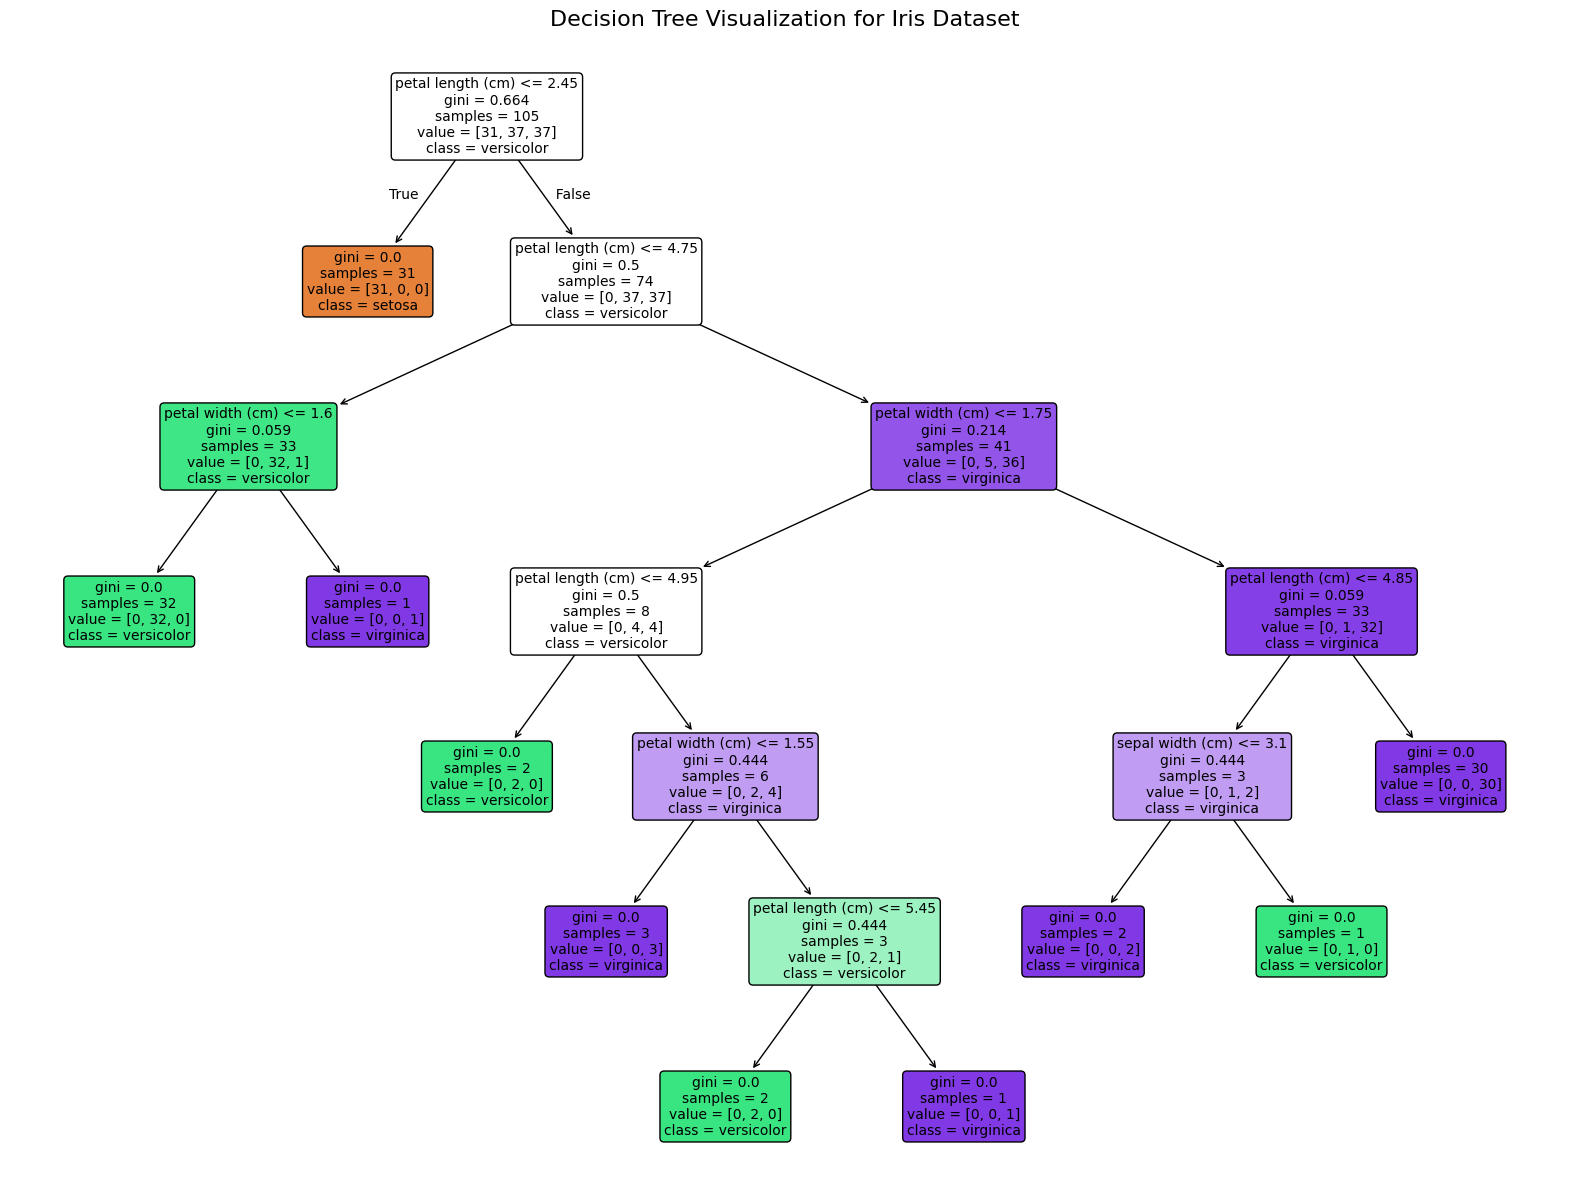

Decision Tree visualization displayed.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size for better visualization
plt.figure(figsize=(20,15))

# Get class names from the iris dataset for better understanding of the visualization
class_names = [str(x) for x in iris.target_names]

# Visualize the decision tree
plot_tree(dt_classifier,
          feature_names=X.columns,  # Feature names
          class_names=class_names,  # Class names for target variable
          filled=True,              # Fill nodes with color indicating the majority class
          rounded=True,             # Round corners of nodes
          fontsize=10);             # Adjust font size for readability

plt.title("Decision Tree Visualization for Iris Dataset", fontsize=16)
plt.show()
print("Decision Tree visualization displayed.")

### Explanation of Decision Tree Concepts

Based on the visualization of our trained Decision Tree for the Iris dataset, let's explain the core concepts:

**a. Decision Nodes**

Decision nodes are the points in the tree where a decision is made based on a feature's value, leading to a split in the data. They are typically represented by rectangular boxes (as seen in our visualization) that are not at the very bottom of the tree. Each decision node contains:

*   **Feature and Threshold**: The condition used to split the data (e.g., `petal length (cm) <= 2.45`).
*   **Gini Impurity**: A measure of the impurity of the node's data. A lower Gini value indicates a more homogeneous node.
*   **Samples**: The number of data points that reached this node.
*   **Value**: The distribution of classes within this node (e.g., `[50, 50, 50]` means 50 samples of class 0, 50 of class 1, and 50 of class 2).
*   **Class**: The majority class in that node.

For example, the very first node (the root) is a decision node: `petal length (cm) <= 2.45`. It splits the dataset into two branches.

**b. Leaves (Terminal Nodes)**

Leaves, also known as terminal nodes, are the nodes at the end of the branches. They represent the final classification or prediction made by the tree. In our visualization, these are the nodes at the bottom that do not split further. They typically have a low (ideally zero) Gini impurity and predict a specific class.

For instance, the leftmost node in the tree, which results from `petal length (cm) <= 2.45` being true, is a leaf node. It has `gini = 0.0`, `samples = 50`, `value = [50, 0, 0]`, and predicts `class = 0` (setosa).

**c. Gini Impurity/Entropy**

In our visualization, each node displays its `gini` value. Gini impurity is a metric used by the CART algorithm to measure the impurity or mixed-upness of the samples at a node. It ranges from 0 to 0.5. A `gini` value of 0 means the node is perfectly pure (all samples belong to the same class), while a `gini` value closer to 0.5 means the samples are equally distributed among multiple classes.

The goal of the decision tree algorithm is to find splits that maximally reduce Gini impurity from the parent node to the child nodes. For example, the root node has `gini = 0.667`. After the split, the left child has `gini = 0.0` (pure), and the right child has `gini = 0.5`.

*(Note: While Entropy is another impurity measure, `sklearn`'s default for `DecisionTreeClassifier` is Gini impurity. Both serve the same purpose of quantifying randomness/impurity.)*

**d. CART Algorithm**

The Decision Tree in the visualization was built using the CART (Classification and Regression Trees) algorithm. CART works by recursively splitting the dataset into two subsets based on a single feature and a threshold value, aiming to create the purest possible child nodes. This process continues until a stopping criterion is met (e.g., maximum depth reached, minimum samples per leaf, or no further impurity reduction possible).

1.  **Splitting**: It evaluates all possible splits on all features to find the one that yields the largest reduction in impurity (Gini impurity in this case).
2.  **Recursive Partitioning**: Once a split is found, the data is divided, and the process is repeated for each child node independently.
3.  **Binary Tree**: CART always produces binary trees, meaning each node has at most two children, as seen in our visualization.

**e. Feature and Threshold**

For each decision node, the visualization clearly shows the **feature** and **threshold** used for splitting. This is the condition that determines which path a data point will take down the tree.

*   **Root Node**: `petal length (cm) <= 2.45`. Data points with petal length less than or equal to 2.45 cm go left, others go right.
*   **Next Decision (right branch)**: `petal width (cm) <= 1.75`. Data points with petal width less than or equal to 1.75 cm go left, others go right.

These feature-threshold pairs are critical as they define the boundaries and rules the decision tree uses to classify new, unseen data.

### Explanation of Decision Tree Concepts

Based on the visualization of our trained Decision Tree for the Iris dataset, let's explain the core concepts:

**a. Decision Nodes**

Decision nodes are the points in the tree where a decision is made based on a feature's value, leading to a split in the data. They are typically represented by rectangular boxes (as seen in our visualization) that are not at the very bottom of the tree. Each decision node contains:

*   **Feature and Threshold**: The condition used to split the data (e.g., `petal length (cm) <= 2.45`).
*   **Gini Impurity**: A measure of the impurity of the node's data. A lower Gini value indicates a more homogeneous node.
*   **Samples**: The number of data points that reached this node.
*   **Value**: The distribution of classes within this node (e.g., `[50, 50, 50]` means 50 samples of class 0, 50 of class 1, and 50 of class 2).
*   **Class**: The majority class in that node.

For example, the very first node (the root) is a decision node: `petal length (cm) <= 2.45`. It splits the dataset into two branches.

**b. Leaves (Terminal Nodes)**

Leaves, also known as terminal nodes, are the nodes at the end of the branches. They represent the final classification or prediction made by the tree. In our visualization, these are the nodes at the bottom that do not split further. They typically have a low (ideally zero) Gini impurity and predict a specific class.

For instance, the leftmost node in the tree, which results from `petal length (cm) <= 2.45` being true, is a leaf node. It has `gini = 0.0`, `samples = 50`, `value = [50, 0, 0]`, and predicts `class = 0` (setosa).

**c. Gini Impurity/Entropy**

In our visualization, each node displays its `gini` value. Gini impurity is a metric used by the CART algorithm to measure the impurity or mixed-upness of the samples at a node. It ranges from 0 to 0.5. A `gini` value of 0 means the node is perfectly pure (all samples belong to the same class), while a `gini` value closer to 0.5 means the samples are equally distributed among multiple classes.

The goal of the decision tree algorithm is to find splits that maximally reduce Gini impurity from the parent node to the child nodes. For example, the root node has `gini = 0.667`. After the split, the left child has `gini = 0.0` (pure), and the right child has `gini = 0.5).

*(Note: While Entropy is another impurity measure, `sklearn`'s default for `DecisionTreeClassifier` is Gini impurity. Both serve the same purpose of quantifying randomness/impurity.)*

**d. CART Algorithm**

The Decision Tree in the visualization was built using the CART (Classification and Regression Trees) algorithm. CART works by recursively splitting the dataset into two subsets based on a single feature and a threshold value, aiming to create the purest possible child nodes. This process continues until a stopping criterion is met (e.g., maximum depth reached, minimum samples per leaf, or no further impurity reduction possible).

1.  **Splitting**: It evaluates all possible splits on all features to find the one that yields the largest reduction in impurity (Gini impurity in this case).
2.  **Recursive Partitioning**: Once a split is found, the data is divided, and the process is repeated for each child node independently.
3.  **Binary Tree**: CART always produces binary trees, meaning each node has at most two children, as seen in our visualization.

**e. Feature and Threshold**

For each decision node, the visualization clearly shows the **feature** and **threshold** used for splitting. This is the condition that determines which path a data point will take down the tree.

*   **Root Node**: `petal length (cm) <= 2.45`. Data points with petal length less than or equal to 2.45 cm go left, others go right.
*   **Next Decision (right branch)**: `petal width (cm) <= 1.75`. Data points with petal width less than or equal to 1.75 cm go left, others go right.

These feature-threshold pairs are critical as they define the boundaries and rules the decision tree uses to classify new, unseen data.

## Analyze Feature Importance

### Subtask:
Calculate and display the feature importances determined by the decision tree model, explaining how they indicate the relevance of each feature in making predictions.


**Reasoning**:
First, calculate the feature importances from the trained decision tree model, convert them to a pandas Series, and then sort them for easy interpretation. This code block directly addresses steps 1-4 of the instructions.



In [ ]:
import pandas as pd

# 1. Access the feature_importances_ attribute
importances = dt_classifier.feature_importances_

# 2. Create a pandas Series from these importances
feature_importances = pd.Series(importances, index=X.columns)

# 3. Sort the feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 4. Print the sorted feature importances
print("Feature Importances:")
print(feature_importances_sorted)

Feature Importances:
petal length (cm)    0.893264
petal width (cm)     0.087626
sepal width (cm)     0.019110
sepal length (cm)    0.000000
dtype: float64


### Explanation of Feature Importance

**Feature importance** in a Decision Tree quantifies the contribution of each feature to the model's predictive power. It is calculated based on how much each feature reduces the impurity (e.g., Gini impurity or entropy) across all splits in the tree where that feature is used. The values are normalized such that the sum of all feature importances is 1.

Looking at our sorted feature importances:

*   **`petal length (cm)`: 0.893264**
*   **`petal width (cm)`: 0.087626**
*   **`sepal width (cm)`: 0.019110**
*   **`sepal length (cm)`: 0.000000**

**How these values indicate relevance:**

A higher feature importance score signifies a greater contribution to reducing the impurity across the tree's splits. In simpler terms, features with higher importance were more frequently (or more effectively) chosen by the Decision Tree algorithm to make splits that led to more homogeneous (purer) child nodes.

From our results:

*   **`petal length (cm)`** is by far the most important feature (with an importance of approximately 0.89). This means that `petal length` was the primary feature used by the decision tree to differentiate between the different species of Iris, contributing most significantly to the reduction of Gini impurity at various decision nodes.
*   **`petal width (cm)`** is the second most important feature, though significantly less important than `petal length` (around 0.09).
*   **`sepal width (cm)`** has a very small importance (around 0.02), indicating it played a minor role in the decision-making process.
*   **`sepal length (cm)`** has an importance of 0.0, which means it was not used at all by this particular decision tree to make any splits. This implies that for this model and dataset, `sepal length` did not help in improving the purity of the nodes.

This analysis helps us understand which characteristics of the Iris flowers are most crucial for classifying them into their respective species, according to our trained model.

## Explain Pruning and Decision Boundaries

### Subtask:
Provide a conceptual explanation of pruning and how it prevents overfitting, and then visualize the decision boundaries of a simplified decision tree model to illustrate how it partitions the feature space.


### Explanation of Pruning

**Pruning** in Decision Trees is a technique used to reduce the size of the tree by removing sections of the tree that provide little power to classify instances. The main goal of pruning is to prevent **overfitting**, which occurs when a model learns the training data too well, capturing noise and specific patterns that do not generalize to new, unseen data.

Without pruning, a decision tree can grow to be very complex, creating a highly specific model that perfectly classifies the training data but performs poorly on test data. Pruning helps to simplify the tree, making it more generalized and robust.

There are two main types of pruning:

1.  **Pre-pruning (or Early Stopping)**: This involves stopping the tree construction early. Instead of growing a full tree and then pruning it back, the tree growth is halted when it reaches a certain complexity or when further splitting does not significantly improve the model's performance (e.g., impurity reduction falls below a threshold).

    *   A common pre-pruning technique is setting the `max_depth` parameter. As seen in `sklearn`'s `DecisionTreeClassifier`, `max_depth` limits how deep the tree can grow. A shallower tree is less likely to overfit because it makes fewer, broader decisions.

2.  **Post-pruning**: This involves growing a full decision tree and then removing branches or nodes that are found to be unnecessary or detrimental to generalization. This is often done by evaluating the performance of subtrees on a validation set and removing those that do not contribute positively.

By simplifying the decision tree through pruning, we achieve a balance between bias and variance, leading to better predictive performance on unseen data.

**Reasoning**:
The next instruction is to visualize the decision boundaries of a simplified decision tree model. This involves selecting specific features, defining a range of `max_depth` values, creating a meshgrid, training a `DecisionTreeClassifier` for each `max_depth`, predicting on the meshgrid, and finally generating contour and scatter plots to visualize the decision boundaries. All these steps can be consolidated into a single code block.



<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3034414597.py:43: SyntaxWarning: invalid escape sequence '\m'
  actual_labels = [iris.target_names[int(label.strip('$\mathdefault{}'))] for label in labels_numeric]
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


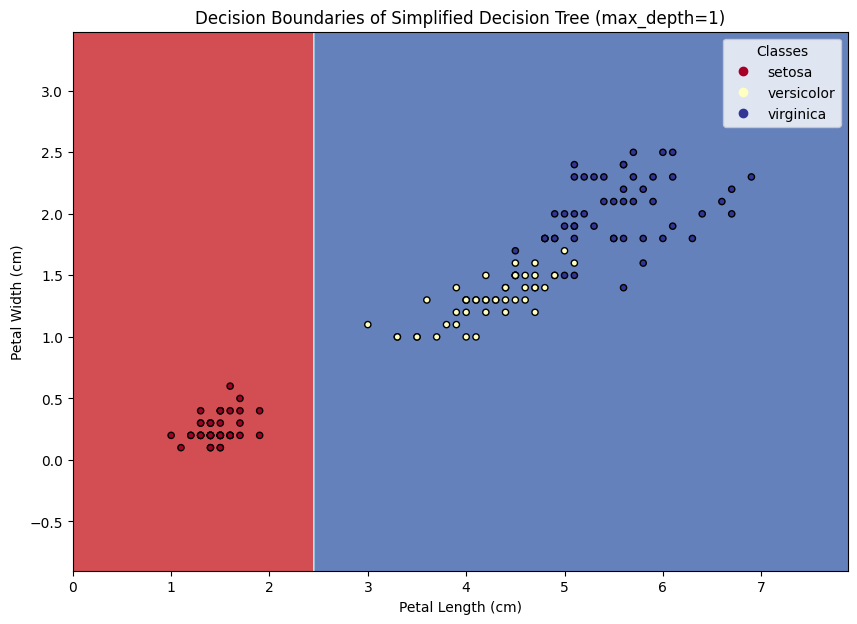

Decision boundaries visualized for max_depth=1.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


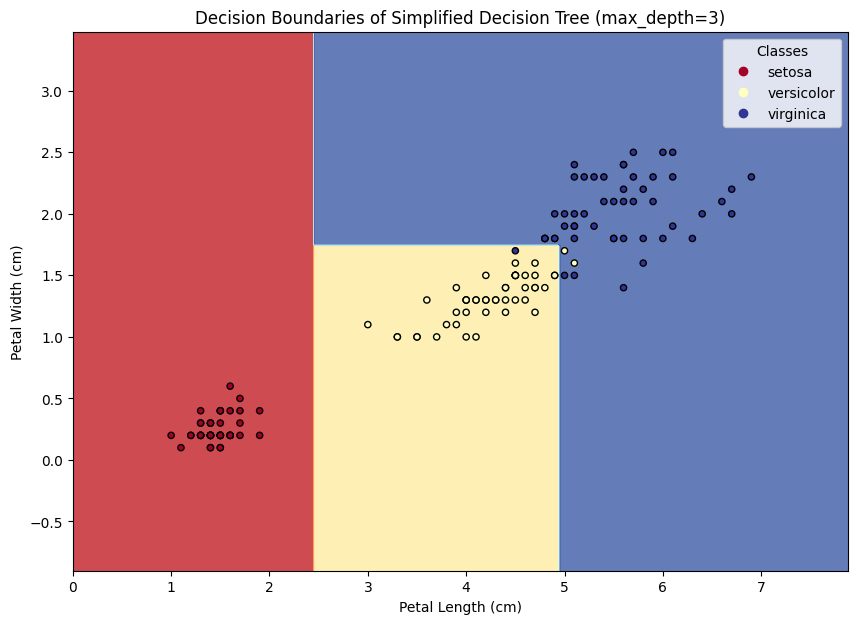

Decision boundaries visualized for max_depth=3.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


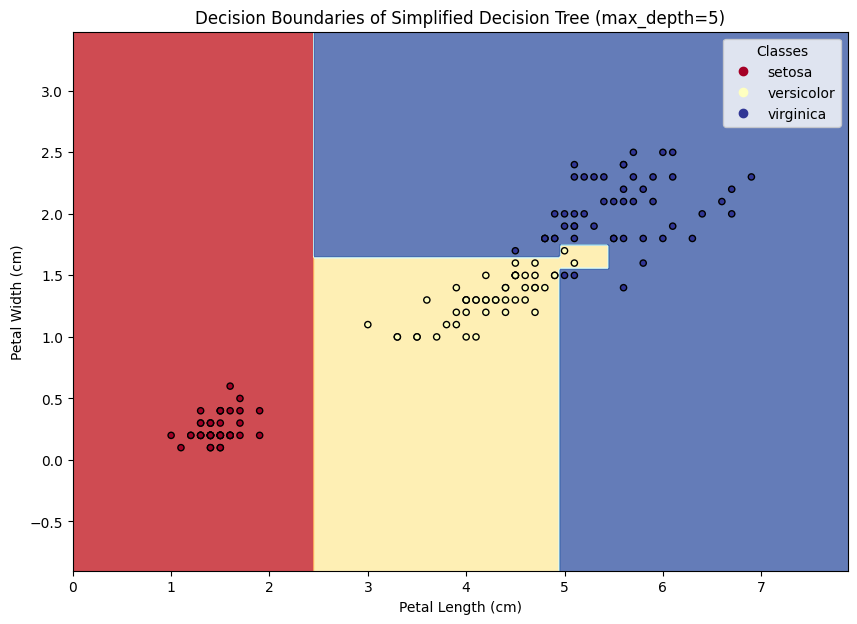

Decision boundaries visualized for max_depth=5.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


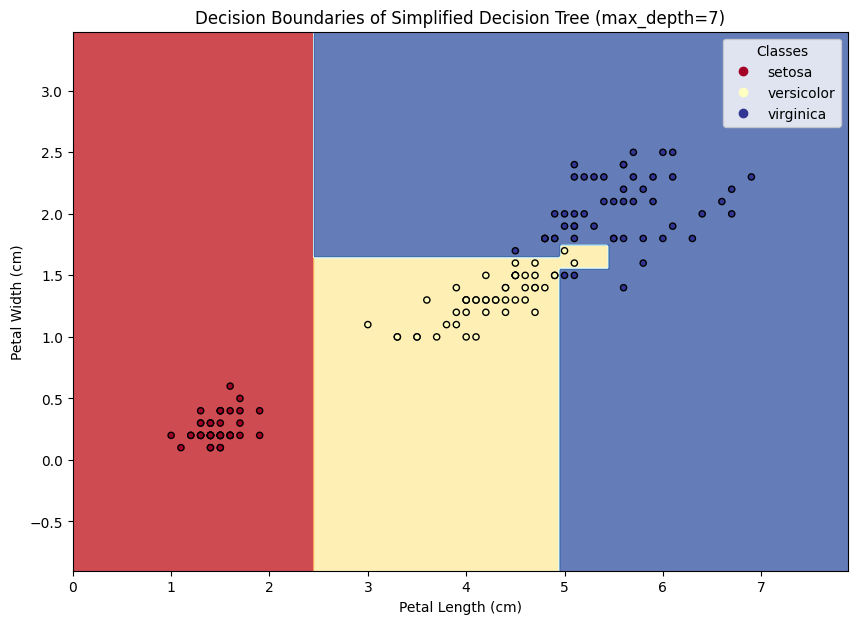

Decision boundaries visualized for max_depth=7.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Select the `petal length (cm)` and `petal width (cm)` features for 2D visualization
X_simple = X[['petal length (cm)', 'petal width (cm)']]
y_simple = y

# Define a range of max_depth values to visualize
max_depth_values = [1, 3, 5, 7]

# Create a meshgrid for plotting (this can be outside the loop as X_simple is constant)
x_min, x_max = X_simple.iloc[:, 0].min() - 1, X_simple.iloc[:, 0].max() + 1
y_min, y_max = X_simple.iloc[:, 1].min() - 1, X_simple.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Loop through different max_depth values
for depth in max_depth_values:
    # 1. Instantiate and fit a new DecisionTreeClassifier with the current max_depth
    dt_simple_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_simple_classifier.fit(X_simple, y_simple)

    # 2. Use the fitted model to predict the class for each point in the meshgrid
    Z = dt_simple_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 3. Create a contour plot for decision regions and overlay scatter plot of original data
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot also the training points
    scatter = plt.scatter(X_simple.iloc[:, 0], X_simple.iloc[:, 1], c=y_simple,
                          cmap=plt.cm.RdYlBu, edgecolor='k', s=20)

    # 4. Add appropriate labels, title, and legend
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(f'Decision Boundaries of Simplified Decision Tree (max_depth={depth})')

    # Create a legend
    handles, labels_numeric = scatter.legend_elements()
    actual_labels = [iris.target_names[int(label.strip('$\mathdefault{}'))] for label in labels_numeric]
    plt.legend(handles=handles, labels=actual_labels, title='Classes')

    # 5. Display the plot
    plt.show()

    print(f"Decision boundaries visualized for max_depth={depth}.")

### Explanation of Decision Boundaries

The visualization clearly shows how the simplified Decision Tree (`max_depth=3`) partitions the 2D feature space (`petal length` and `petal width`) into distinct regions, each corresponding to a predicted class (Iris-setosa, Iris-versicolor, Iris-virginica).

**How they are formed by Decision Tree's rules:**

The decision boundaries are essentially rectangular regions because a Decision Tree makes splits based on a single feature at a time. Each split corresponds to a horizontal or vertical line in our 2D plot.

*   **Horizontal/Vertical Lines**: For example, an early split might be `petal length (cm) <= 2.45`. This creates a vertical line at `x = 2.45`. All points to the left of this line would go one way, and all points to the right would go the other. Similarly, a split like `petal width (cm) <= 1.75` would create a horizontal line at `y = 1.75`.
*   **Recursive Partitioning**: The tree recursively applies these rules. After the first split, the algorithm looks for the next best split *within each of the newly formed regions*. This leads to further horizontal or vertical lines, subdividing the space until a leaf node is reached or the `max_depth` (in this case, 3) is attained.
*   **Regions of Prediction**: Each final, smallest region in the plot represents a leaf node of the decision tree. All data points falling within that region are assigned the same class label, which is the majority class of the training samples that ended up in that leaf node.

**How the tree partitions the feature space for classification:**

1.  **Rectangular Regions**: The decision tree carves up the feature space into a set of non-overlapping rectangular regions. Each region corresponds to a specific class prediction.
2.  **Sequential Decisions**: Classification for a new data point involves traversing the tree, making a series of yes/no decisions at each node based on its feature values. Each decision guides the data point into a specific sub-region of the feature space.
3.  **Simplicity with `max_depth`**: By setting `max_depth=3`, we deliberately limited the complexity of these partitions. This results in fewer, larger regions, making the boundaries simpler and often more interpretable, while also mitigating overfitting by preventing the tree from creating overly complex boundaries that might only fit the training data noise.

In our visualization, you can observe how the regions are formed by these axis-parallel splits, clearly separating the three Iris species based on their petal dimensions. The decision boundaries effectively define the

## Final Summary and Next Steps

### Subtask:
Conclude the demo with a comprehensive summary of all key Decision Tree concepts covered and suggest potential next steps for students.


## Summary:

### Data Analysis Key Findings

*   The demonstration successfully introduced core Decision Tree concepts, including the CART algorithm, Gini Impurity/Entropy, Decision Nodes, Leaves, Feature Importance, Pruning, and Decision Boundaries.
*   For a simple 'fruit basket' dataset, initial Gini Impurity for 'Fruit' was 0.6250 and Entropy was 1.5000. Splitting by 'Color' for 'Red' and 'Orange' fruits reduced impurity to 0.0000, illustrating impurity reduction.
*   For the Iris dataset's target variable, the initial Gini Impurity was 0.6667 and Entropy was 1.5850. A split on `petal length (cm) <= 2.45` resulted in a perfectly pure left branch (Gini: 0.0000, Entropy: 0.0000) and a significant Information Gain (Gini: 0.3333, Entropy: 0.9183).
*   Comparing Information Gain across other Iris features with a mean-based split: `petal width (cm)` yielded the highest Information Gain (Gini: 0.2593, Entropy: 0.7303), indicating it is the most effective feature for impurity reduction among `sepal length (cm)`, `sepal width (cm)`, and `petal width (cm)`. `sepal width (cm)` had the lowest Information Gain (Gini: 0.1116, Entropy: 0.2606).
*   A Decision Tree Classifier was successfully trained on the Iris dataset.
*   Visualization of the trained Decision Tree clearly illustrated Decision Nodes, Leaves, Gini impurity values at each node, and the binary splitting nature of the CART algorithm.
*   Feature importance analysis revealed that `petal length (cm)` is the most crucial feature for classification (importance: 0.893), followed by `petal width (cm)` (importance: 0.088). `sepal length (cm)` had no importance (0.000), meaning it was not used by the model.
*   The concept of pruning was explained, highlighting its role in preventing overfitting. Visualization of decision boundaries for simplified trees with varying `max_depth` (1, 3, 5, 7) demonstrated how Decision Trees partition feature space into rectangular regions via axis-parallel splits, and how `max_depth` controls model complexity and boundary shape.

### Insights or Next Steps

*   **Reinforce Practical Application**: Students should be encouraged to experiment with different hyperparameters (e.g., `max_depth`, `min_samples_leaf`) on other datasets to observe their impact on tree structure, performance, and overfitting, thereby deepening their understanding of pruning.
*   **Explore Ensemble Methods**: As a natural progression, students could investigate ensemble methods like Random Forests and Gradient Boosting, which build upon Decision Trees to improve predictive power and robustness, offering a next step in their machine learning journey.
